In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
filename = 'Daily Bike Sharing.csv'
path = '..\Dataset'
filepath = os.path.join(path,filename)
print(filepath)

..\Dataset\Daily Bike Sharing.csv


In [7]:
data = pd.read_csv(filepath, index_col='dteday',parse_dates = True)
#data = pd.read_csv(filepath)

In [38]:
data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
df = data.copy()

In [17]:
#select variables
df = data.loc[:, ["cnt", "holiday", "workingday", "weathersit",
                       "temp", "atemp", "hum", "windspeed"]]
df.head(1)   

,cnt,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


In [18]:
df.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq=None)

In [21]:
df=df.asfreq('D')

In [22]:
df.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq='D')

In [24]:
df = df.rename(columns = {'cnt' : 'y'})
df.head(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


<AxesSubplot:xlabel='dteday'>

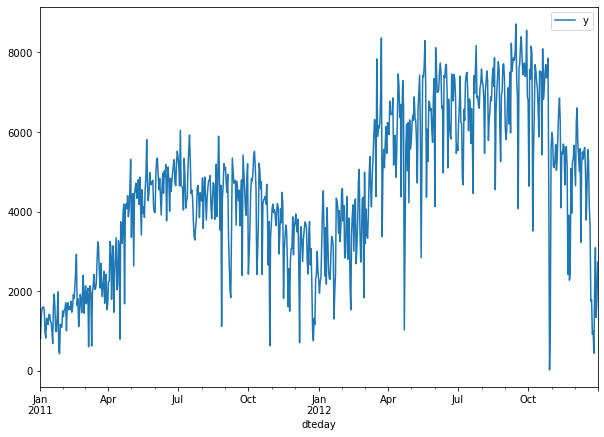

In [25]:
#viz
df["y"].plot(figsize = (10, 7), legend = True)

In [27]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
stationarity = adfuller(df['y'])
print('Augmented Dickey Fuller p-value: %F' % stationarity[1])

Augmented Dickey Fuller p-value: 0.342743


In [29]:
#Training and test set
test_days = 31
training_set = df.iloc[:-test_days, :]
test_set = df.iloc[-test_days:, :]
test_set.tail(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2012-12-31,2729,0,1,2,0.215833,0.223487,0.5775,0.154846


In [30]:
#exogenous variables
train_exog = training_set.iloc[:,1:]
test_exog = test_set.iloc[:,1:]
test_exog.head()

,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,
2012-12-01,0,0,2,0.298333,0.316904,0.806667,0.059704
2012-12-02,0,0,2,0.347500,0.359208,0.823333,0.124379
2012-12-03,0,1,1,0.452500,0.455796,0.767500,0.082721
2012-12-04,0,1,1,0.475833,0.469054,0.733750,0.174129
2012-12-05,0,1,1,0.438333,0.428012,0.485000,0.324021


In [31]:
#Libraries
from pmdarima import auto_arima

In [32]:
#forecasting model
model = auto_arima(y = training_set['y'],
                   X = train_exog,
                   m = 7,
                   seasonal = True,
                   stepwise = False)

In [33]:
#summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -5596.921
Date:                Mon, 31 Oct 2022   AIC                          11217.842
Time:                        13:20:29   BIC                          11272.438
Sample:                    01-01-2011   HQIC                         11238.948
                         - 11-30-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.3357      5.559      0.780      0.435      -6.561      15.232
holiday     -240.2951    129.083     -1.862      0.063    -493.293      12.703
workingday    89.2465     60.514      1.475      0.140     -29.359     207.852
weathersit  -460.1476     51.290     -8.971      0.000    -560.675    -359.620
temp        3421.5810   1170.376      2.923      0.003    1127.687    5715.475
atemp       1970.5514   1196.949      1.646      0.100    -375.425    4316.528
hum        -2280.3690    198.460    -11.490      0.000   -2669.343   -1891.395
windspeed  -2275.6010    373.290     -6.096      0.000   -3007.235   -1543.967
ma.L1         -0.5543      0.028    -19.636      0.000      -0.610      -0.499
ma.L2         -0.1349      0.039     -3.428      0.001      -0.212      -0.058
ma.L3         -0.1445      0.040     -3.612      0.000      -0.223      -0.066
sigma2      5.261e+05   2.01e+04     26.113      0.000    4.87e+05    5.66e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               623.47
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.51   Skew:                            -0.92
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
#predictions
predictions_sarimax = pd.Series(model.predict(n_periods= test_days,
                              X = test_exog)).rename("SARIMAX")
predictions_sarimax.index = test_set.index                              
predictions_sarimax

dteday
2012-12-01    4289.176704
2012-12-02    4217.094773
2012-12-03    5448.313373
2012-12-04    5427.564234
2012-12-05    5448.862660
2012-12-06    4779.657768
2012-12-07    4189.911053
2012-12-08    4177.351286
2012-12-09    4076.009606
2012-12-10    4317.657867
2012-12-11    4356.275245
2012-12-12    4524.637451
2012-12-13    5071.460529
2012-12-14    4766.747766
2012-12-15    4953.846710
2012-12-16    4274.667868
2012-12-17    4385.769622
2012-12-18    5195.262454
2012-12-19    4976.494088
2012-12-20    4519.014084
2012-12-21    4149.208348
2012-12-22    4375.104791
2012-12-23    4812.022009
2012-12-24    3892.593320
2012-12-25    3763.446255
2012-12-26    2788.652292
2012-12-27    3614.817908
2012-12-28    4258.718543
2012-12-29    3848.121158
2012-12-30    4399.694384
2012-12-31    4111.154512
Freq: D, Name: SARIMAX, dtype: float64

<AxesSubplot:xlabel='dteday'>

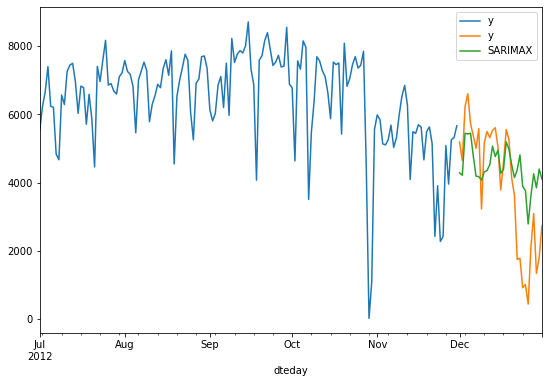

In [35]:
#visualization
training_set['y']['2012-07-01':].plot(figsize = (9,6), legend = True)
test_set['y'].plot(legend = True)
predictions_sarimax.plot(legend = True)

In [36]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set['y'], predictions_sarimax),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_sarimax)), 0))

1180.0
1480.0


In [37]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_sarimax)

71.2623567333771